In [2]:
#!/usr/bin/python

import os
import sys
import shutil
import traceback

import matplotlib.pyplot as plt
import numpy as np
import logging

from mobile_insight.monitor import OfflineReplayer
from uplink_booster_analyzer import lte_measurement_analyzer
from uplink_booster_analyzer import goodsol_analyzer
from uplink_booster_analyzer import uplink_latency_analyzer
from uplink_booster_analyzer import ul_mac_latency_analyzer
from uplink_booster_analyzer import lte_wireless_error_analyzer
from uplink_booster_analyzer import object_latency_analyzer
from uplink_booster_analyzer import lte_mac_analyzer
from uplink_booster_analyzer import lte_rlc_analyzer
from uplink_booster_analyzer import lte_rrc_analyzer
from uplink_booster_analyzer import bsr_table
from uplink_booster_analyzer import lte_pdcp_ulgap_analyzer
    

def bullet_analysis(file_path):
  src = OfflineReplayer()
  #src.set_input_path("./logs/latency_sample.mi2log")
  src.set_input_path(file_path)
  # print (sys.argv[1])

  phy_analyzer = goodsol_analyzer.MyAnalyzer()
  #phy_analyzer.set_source(src)

  meas_analyzer = lte_measurement_analyzer.LteMeasurementAnalyzer()
  meas_analyzer.set_source(src)

  uplink_analyzer = uplink_latency_analyzer.UplinkLatencyAnalyzer()
  #uplink_analyzer.set_source(src)

  mac_analyzer = lte_mac_analyzer.LteMacAnalyzer()
  #mac_analyzer.set_source(src)
  
  rlc_analyzer = lte_rlc_analyzer.LteRlcAnalyzer()
  rlc_analyzer.set_source(src)

  error_analyzer = lte_wireless_error_analyzer.LteWirelessErrorAnalyzer()
  #error_analyzer.set_source(src)

  fb_analyzer = object_latency_analyzer.ObjectLatencyAnalyzer()
  fb_analyzer.set_source(src)

  pdcp_analyer = lte_pdcp_ulgap_analyzer.LtePdcpUlGapAnalyzer()
  #pdcp_analyer.set_source(src)

  #mac_analyzer = lte_mac_analyzer.LteMacAnalyzer()
  #mac_analyzer.set_source(src)
  
  rrc_analyzer = lte_rrc_analyzer.LteRrcAnalyzer()
  #rrc_analyzer.set_source(src)

  src.run()

  return fb_analyzer


ModuleNotFoundError: No module named 'mobile_insight'

In [3]:
def get_object_latency(object_analysis):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-3-2ae0f6ff7155>, line 2)

In [3]:
def do_analysis (ex_num):
    path_dir = './mobisys-ex/ex'+str(ex_num)
    if ex_num == 2:
        operator_set = ['skt']
        server_set = ['seoul', 'singapore']
        object_size_set = ['100', '500', '1000']
        interval_set = ['100']
        ex2_list = [[[] for _ in range(len(object_size_set))] for _ in range(len(server_set))]
        ex2_object= [[[] for _ in range(len(object_size_set))] for _ in range(len(server_set))]
        for operator in operator_set:
            for i, server in enumerate(server_set):
                for j, object_size in enumerate(object_size_set):
                    for interval in interval_set:
                        file_name = str(ex_num) +'_'+operator +'_'+ server +'_'+ object_size + '_' + interval +'_500.mi2log'
                        file_path = path_dir +'/'+file_name
                        ex_arr = np.zeros(6)
                        print('Current file path: ' , file_path)
                        fb = bullet_analysis(file_path)
                        fb.calc_delay(start_time = 100, fin_time = 1000000, int(object_size)*0.8)
                        object_analysis, overall, init, sched, tx, grant_mean, grant_std = fb.analyze_object_delay()
                        ex_arr[0] = overall
                        ex_arr[1] = init
                        ex_arr[2] = sched
                        ex_arr[3] = tx
                        ex_arr[4] = grant_mean
                        ex_arr[5] = grant_std

                        ex2_list[i][j] = ex_arr
                        ex2_object[i][j] = object_analysis
                        
        return ex2_list, ex2_object

SyntaxError: positional argument follows keyword argument (<ipython-input-3-9205b63f3500>, line 19)

<Figure size 720x360 with 0 Axes>

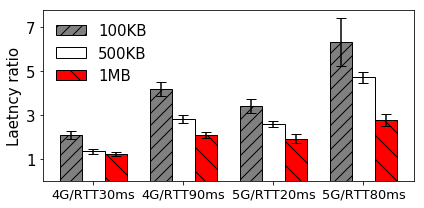

In [120]:
## Figure1. motivation overview
## seoul/singapore 4G/5G ideal vs. real

plt.figure(1, figsize = (10,5))

labels = ['4G/RTT30ms', '4G/RTT90ms', '5G/RTT20ms', '5G/RTT80ms']

file_100 = 100*1024*8
file_500 = 500*1024*8
file_1000 = 1000*1024*8

file_size = np.zeros(3)
file_size[0] = file_100
file_size[1] = file_500
file_size[2] = file_1000

lte_bw = 25.4*1024*1024
nr_bw = 50.3*1024*1024

seoul_lte_rtt = 9
singapore_lte_rtt = 45
seoul_nr_rtt = 5
singapore_nr_rtt = 42

rtt_arr = np.array([seoul_lte_rtt, singapore_lte_rtt, seoul_nr_rtt, singapore_nr_rtt])

def get_optimal(i):
    return np.array([file_size[i]*1000/lte_bw, file_size[i]*1000/lte_bw, 
                    file_size[i]*1000/nr_bw, file_size[i]*1000/nr_bw])


KB_100_optimal = get_optimal(0)
KB100_mean = (np.array([73, 173, 58, 140])- rtt_arr)/KB_100_optimal
KB100_std = np.array([6, 10,5, 17])/KB_100_optimal

KB_500_optimal = get_optimal(1)
KB500_mean =(np.array([214, 476, 206, 407])- rtt_arr)/KB_500_optimal
KB500_std = np.array([15, 29, 12, 20])/KB_500_optimal

KB_1000_optimal = get_optimal(2)
KB1000_mean = (np.array([385, 685, 301, 472])- rtt_arr)/KB_1000_optimal
KB1000_std = [26, 45, 32, 43]/KB_1000_optimal

x = np.arange(len(labels))  # the label locations
width = 0.25# the width of the bars

# including upper limits
uplims = np.zeros(x.shape)

# including lower limits
lolims = np.zeros(x.shape)

fig, ax = plt.subplots(figsize = (6,3))
rects1 = ax.bar(x - width, KB100_mean, width, yerr=KB100_std, label='100KB', hatch='//', color ='grey',edgecolor='black', capsize = 5)
rects2 = ax.bar(x, KB500_mean, width, yerr=KB500_std, label='500KB', color ='white', edgecolor='black', capsize = 5)
rects3 = ax.bar(x + width, KB1000_mean, width, yerr=KB1000_std, label='1MB', hatch = '\\', color ='red',edgecolor='black', capsize =5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Laetncy ratio', size = 15)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(labels, size = 13)
ax.legend(fontsize =15, frameon = False, loc = 'upper left')
#ax.set_ylim([0.5,10])
ax.set_yticks(np.arange(1,8,2))

fig.tight_layout()
plt.savefig('./mobisys22_figure/first_motivation.pdf', format = 'pdf',  bbox_inches='tight')

[1.593088  1.13792   1.0533888]


<Figure size 360x216 with 0 Axes>

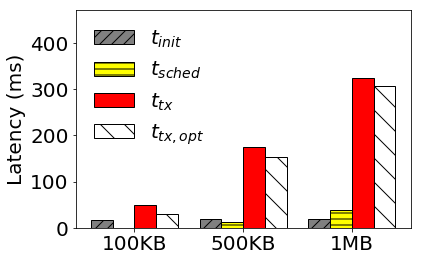

In [105]:
## Figure2: latency breakdown (seoul)

plt.figure(1, figsize = (5,3))

labels = ['100KB','500KB', '1MB']


lte_bw = 25.4*1024*1024
nr_bw = 70.3*1024*1024

init_mean = [17.3, 18.2, 20]
sched_mean = [0.2, 13, 38]
tx_mean = [49, 175, 324]
tx_ideal = [file_100*1000/lte_bw, file_500*1000/lte_bw, file_1000*1000/lte_bw]

x = np.arange(len(labels))  # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, init_mean, width,label=r'$t_{init}$', hatch='//', color ='grey',edgecolor='black')
rects1 = ax.bar(x - 0.5*width, sched_mean, width,label=r'$t_{sched}$', hatch='--', color ='yellow',edgecolor='black')
rects2 = ax.bar(x + 0.5*width, tx_mean, width,  label=r'$t_{tx}$', color ='red', edgecolor='black')
rects3 = ax.bar(x + 1.5*width, tx_ideal, width,  label=r'$t_{tx, opt}$', hatch = '\\', color ='white',edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency (ms)', size = 20)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticklabels(labels, size = 20)
ax.legend(fontsize =20, frameon = False, loc = 'upper left')
ax.set_ylim([0, 470])

plt.savefig('./mobisys22_figure/latnecy_breakdown_seoul.pdf', format = 'pdf',  bbox_inches='tight')
print(np.array(tx_mean)/np.array(tx_ideal))

[3.381248   1.63470336 1.4370304 ]


<Figure size 360x216 with 0 Axes>

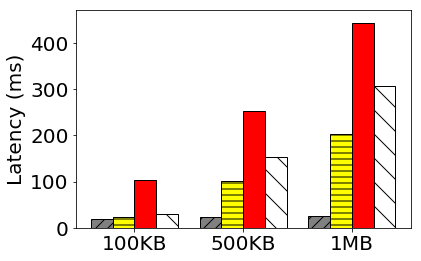

In [106]:
## Figure2: latency breakdown (singapore)

plt.figure(1, figsize = (5,3))

labels = ['100KB','500KB', '1MB']


lte_bw = 25.4*1024*1024
nr_bw = 70.3*1024*1024

init_mean = [20, 23.9, 24.7]
sched_mean = [24, 102, 202]
tx_mean = [104, 251.4, 442]
tx_ideal = [file_100*1000/lte_bw, file_500*1000/lte_bw, file_1000*1000/lte_bw]

x = np.arange(len(labels))  # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, init_mean, width,label=r'$t_{init}$', hatch='//', color ='grey',edgecolor='black')
rects1 = ax.bar(x - 0.5*width, sched_mean, width,label=r'$t_{sched}$', hatch='--', color ='yellow',edgecolor='black')
rects2 = ax.bar(x + 0.5*width, tx_mean, width,  label=r'$t_{tx}$', color ='red', edgecolor='black')
rects3 = ax.bar(x + 1.5*width, tx_ideal, width,  label=r'$t_{tx, opt}$', hatch = '\\', color ='white',edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency (ms)', size = 20)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticklabels(labels, size = 20)
ax.set_ylim([0, 470])

plt.savefig('./mobisys22_figure/latnecy_breakdown_singapore.pdf', format = 'pdf',  bbox_inches='tight')
print(np.array(tx_mean)/np.array(tx_ideal))

In [111]:
KB1000_mean

array([1.2224512, 2.080768 , 3.1134464, 3.869312 ])

In [33]:
sum = np.array(init_mean) + np.array(sched_mean) + np.array(tx_mean)
np.array(sum)/np.array(tx_ideal)

array([3.706368  , 2.58340352, 2.17407744])

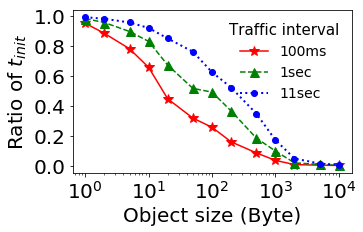

In [89]:
## Figure 3-1: portion of t_init
plt.figure(2, figsize=(5,3))
x = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

init_100ms = [0.95, 0.883, 0.78, 0.656, 0.446, 0.317, 0.256, 0.159, 0.085, 0.035, 0.007, 0.003, 0.001]
init_1s = [0.9812456 , 0.95482143, 0.89530646, 0.82926583, 0.67082618,
       0.51555215, 0.49038009, 0.3652431 , 0.18355776, 0.09756684,
       0.01867025, 0.00758763, 0.00262131]
init_11s = [0.99019317, 0.98016285, 0.95511407, 0.9186802 , 0.84876476,
       0.7599976 , 0.62375859, 0.52122903, 0.34709134, 0.17097643,
       0.04756746, 0.01373297, 0.00593279]

plt.plot(x, init_100ms, color = 'r', linestyle = '-', marker = '*', markersize = 10)
plt.plot(x, init_1s, color = 'g', linestyle = '--', marker = '^', markersize = 9)
plt.plot(x, init_11s, color = 'b', linestyle = ':', marker = 'o', linewidth = 2)
plt.xscale("log")
l = plt.legend(['100ms','1sec','11sec'], title = 'Traffic interval', fontsize = 14, frameon = False)
l.get_title().set_fontsize('15')
plt.xlabel('Object size (Byte)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Ratio of 'r'$t_{init}$', fontsize = 20)

plt.savefig('./mobisys22_figure/init_ratio.pdf', format = 'pdf',  bbox_inches='tight')

In [15]:
def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

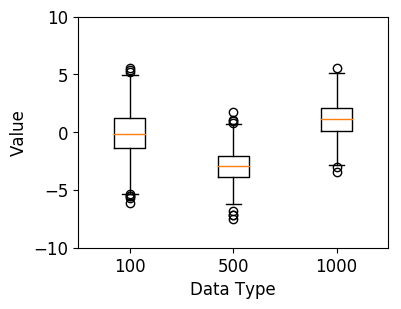

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([data_a, data_b, data_c], labels = [100, 500, 1000])
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

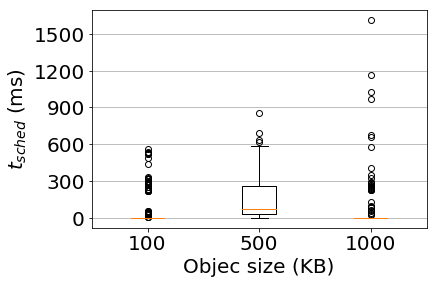

In [139]:
## Figure 4-1: portion of t_sched (95%)
plt.figure(2, figsize=(6,4))

size= [100,500,1000]
cwnd = [50, 100, 150, 200]

data_a = np.load('./overlink_data/sched_box/sched_arr_100.npy')
data_b = np.load('./overlink_data/sched_box/sched_arr_500.npy')
data_c = np.load('./overlink_data/sched_box/sched_arr_1000.npy')

plt.boxplot([data_a, data_b, data_c], labels = [100, 500, 1000])
plt.yticks(fontsize = 20)
plt.yticks(np.arange(0, 1600,300),fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('Objec size (KB)', fontsize = 20)
plt.ylabel(r'$t_{sched}$ (ms)', fontsize = 20)
plt.grid(color='grey', linestyle='-', linewidth=0.5, axis='y')
plt.savefig('./mobisys22_figure/sched_val.pdf', format = 'pdf',  bbox_inches='tight')

In [35]:
np.std(data_a)

116.00853260347415

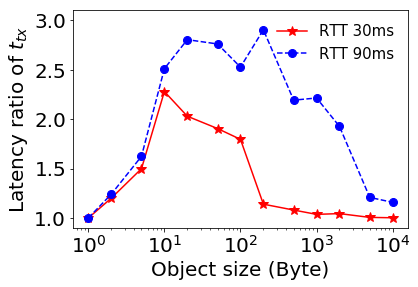

In [138]:
## Figure 5-1: t_tx ratio compared to ideal

plt.figure(2, figsize=(6,4))

x = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
bw = 24.4*1024*1024
ideal = np.array(x)*8*1024*1000/bw
ideal[ideal<1] = 1


tx_seoul = np.array([1, 1.2, 2.4, 7.3, 13, 30.5, 57.5, 73, 173, 332, 669, 1611, 3210])
tx_singapore = np.array([1, 1.24, 2.6, 8.04, 17.96, 44.2, 80.9, 186, 351, 709, 1234, 1935, 3710])
plt.plot(x, 1/(ideal/tx_seoul), color = 'r', linestyle = '-', marker = '*', markersize = 10)
plt.plot(x, 1/(ideal/tx_singapore), color = 'b', linestyle = '--', marker = 'o', markersize = 8)
plt.xscale("log")
l = plt.legend(['RTT 30ms', 'RTT 90ms'],fontsize = 15, frameon = False, loc = 'upper right')
plt.yticks(np.arange(1,3.1,0.5),fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylim([0.9,3.1])
plt.xlabel('Object size (Byte)', fontsize =20)
plt.ylabel('Latency ratio of 'r'$t_{tx}$', fontsize = 20)

plt.savefig('./mobisys22_figure/tx_ratio.pdf', format = 'pdf',  bbox_inches='tight')

In [134]:
## Figure 3-2: distribution of t_init

init_skt_idle_dist = np.load('./overlink_data/init_skt_idle/init_arr.npy')
init_kt_idle_dist = np.load('./overlink_data/init_kt_idle/init_arr.npy')
init_lg_idle_dist = np.load('./overlink_data/init_lg_idle/init_arr.npy')
init_2user_dist = np.load('./overlink_data/init_skt_2cell/init_arr.npy')
init_3user_dist = np.load('./overlink_data/init_skt_3cell/init_arr.npy')

In [135]:
np.percentile(init_kt_idle_dist, 95)
np.percentile(init_3user_dist, 95)

26.0

In [7]:
def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

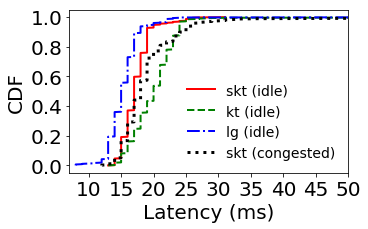

In [137]:
## up to 78ms (lg)
## up to 108ms (congested)

plt.figure(2, figsize=(5,3))
cdf(init_skt_idle_dist, color = 'red', linestyle = '-', linewidth = 2)
cdf(init_kt_idle_dist, color = 'green', linestyle = '--', linewidth = 2)
cdf(init_lg_idle_dist, color = 'blue', linestyle = '-.', linewidth = 2)
cdf(init_3user_dist, color = 'black', linestyle = ':',  linewidth = 3)
#cdf(c3, color = 'black', linestyle = '-')
#cdf(opt, color = 'green', linestyle = '-')
#plt.ylim([0,1])
plt.xlabel('Latency (ms)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim([7,50])
plt.xticks(fontsize = 20)
plt.ylabel('CDF', fontsize = 20)
plt.legend(['skt (idle)','kt (idle)','lg (idle)', 'skt (congested)'], fontsize = 14,  loc = 'lower right', frameon = False)

plt.savefig('./mobisys22_figure/sched_dist.pdf', format = 'pdf',  bbox_inches='tight')

In [18]:
## Figure 4-1: Latency breakdown: congestion avoidance

rlc_buffer = np.load('./overlink_data/LatencyBreakDown/rlc_buffer.npy')
sr_point = np.load('./overlink_data/LatencyBreakDown/sr_point.npy')
sr_end_point = np.load('./overlink_data/LatencyBreakDown/sr_end_point.npy')
all_grant = np.load('./overlink_data/LatencyBreakDown/all_grant.npy')

sr_point = np.append(sr_point, 270)
sr_end_point = np.append(sr_end_point, 288)
sr_point[1] = 78
sr_point[2] = 165
sr_point[3] = 256

In [19]:
sr_point

array([  0,  78, 165, 256])

In [20]:
import pandas
import csv

f = open('./overlink_data/LatencyBreakDown/latencyBreakdown.csv', 'r')
rdr = csv.reader(f)
inflight = []
for i,row in enumerate(rdr):
    if i==0:
        continue
    if i == 1:
        first_time = row[1]
    inflight.append([float(row[1]) - float(first_time), int(row[-2])])
inflight = np.array(inflight)
inflight[:,1]

array([2.00000e+01, 1.40800e+03, 2.79600e+03, 4.18400e+03, 5.57200e+03,
       6.96000e+03, 8.34800e+03, 9.73600e+03, 1.11240e+04, 1.25120e+04,
       1.39000e+04, 1.52880e+04, 1.66760e+04, 1.80640e+04, 1.94520e+04,
       2.08400e+04, 2.22280e+04, 2.36160e+04, 2.50040e+04, 2.63920e+04,
       2.77800e+04, 2.91680e+04, 3.05560e+04, 3.19440e+04, 3.33320e+04,
       3.47200e+04, 3.61080e+04, 3.74960e+04, 3.88840e+04, 4.02720e+04,
       4.16600e+04, 4.30480e+04, 4.44360e+04, 4.58240e+04, 4.72120e+04,
       4.86000e+04, 4.99880e+04, 5.13760e+04, 5.27640e+04, 5.41520e+04,
       5.55400e+04, 5.69280e+04, 5.83160e+04, 5.97040e+04, 6.10920e+04,
       6.24800e+04, 6.38680e+04, 6.52560e+04, 6.66440e+04, 6.80320e+04,
       6.94200e+04, 7.08080e+04, 7.21960e+04, 7.35840e+04, 7.49720e+04,
       7.63600e+04, 7.77480e+04, 7.91360e+04, 8.05240e+04, 8.19120e+04,
       8.33000e+04, 8.46880e+04, 8.60760e+04, 8.74640e+04, 8.88520e+04,
       9.02400e+04, 9.16280e+04, 9.30160e+04, 9.44040e+04, 9.579

In [21]:
for i, buf in enumerate(rlc_buffer):
    if buf == 0:
        if rlc_buffer[i - 1] != 0 and rlc_buffer[i+1] != 0:
            rlc_buffer[i] = rlc_buffer[i-1]

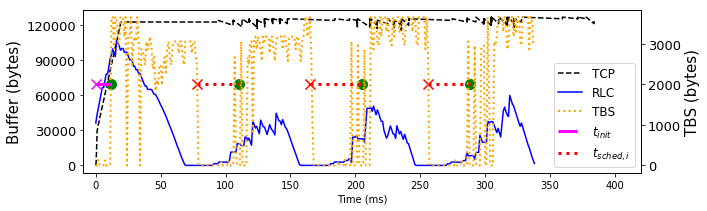

In [22]:
# Transmission procedure: congestion avoidance
fig, ax1 = plt.subplots(1, figsize = (10,3))
plt.xlabel('Time (ms)')

ax1.plot(inflight[:,0]*1000, inflight[:,1], c = 'black', linestyle ='--', label = 'TCP')
ax1.plot(rlc_buffer[:], c = 'blue', label = 'RLC')
ax1.set_ylabel('Buffer (bytes)', size =15)


ax2 = ax1.twinx()
ax2.plot(np.arange(len(all_grant)),all_grant, c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth =2)
ax1.plot(np.nan, c = 'orange', linestyle = 'dotted', label = 'TBS',  linewidth =2)
ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
ax2.set_ylabel('TBS (bytes)', size = 15)
ax1.set_yticks(np.arange(0, 130000, 30000))
ax1.set_yticklabels(np.arange(0, 130000, 30000), fontsize=13)  

for i in range(len(sr_point)):
    y_point = 2000
    if i != 0:
        plt.scatter(sr_point[i], y_point, marker = 'x',  c = 'r', s = 100)
        plt.scatter(sr_end_point[i], y_point, marker = 'o',  c = 'g', s = 100)
        plt.plot([sr_point[i], sr_end_point[i]], [y_point,y_point], c = 'r', linestyle =':',  linewidth = 3)
    if i == 0:
        plt.scatter(sr_point[i], y_point, marker = 'x',  c = 'magenta', s = 100)
        plt.scatter(sr_end_point[i], y_point, marker = 'o',  c = 'g', s = 100)
        plt.plot([sr_point[i], sr_end_point[i]], [y_point,y_point], c = 'magenta', linestyle ='-.',  linewidth = 3)
    
plt.xlim([-10,420])
ax1.legend(loc = 'lower right', fontsize =12)

plt.yticks(fontsize = 13)
plt.savefig('./mobisys22_figure/transmission_procedure.pdf', format = 'pdf',  bbox_inches='tight')

In [23]:
# Transmission procedure: slow start

## Figure 4-1: Latency breakdown: slow start

rlc_buffer = np.load('./overlink_data/LatencyBreakDown_slow-start/rlc_buffer.npy')
sr_point = np.load('./overlink_data/LatencyBreakDown_slow-start/sr_point.npy')
sr_end_point = np.load('./overlink_data/LatencyBreakDown_slow-start/sr_end_point.npy')
all_grant = np.load('./overlink_data/LatencyBreakDown_slow-start/all_grant.npy')



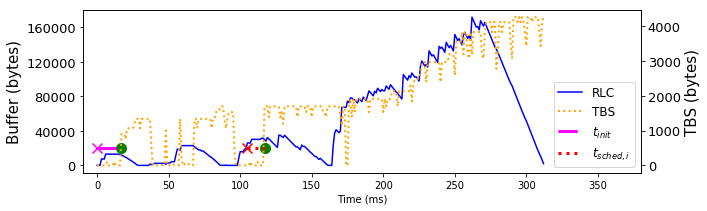

In [24]:
# Transmission procedure: slow start
fig, ax1 = plt.subplots(1, figsize = (10,3))
plt.xlabel('Time (ms)')

ax1.plot(rlc_buffer[:], c = 'blue', label = 'RLC')
ax1.set_ylabel('Buffer (bytes)', size =15)


ax2 = ax1.twinx()
ax2.plot(np.arange(len(all_grant)),all_grant, c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth =2)
ax1.plot(np.nan, c = 'orange', linestyle = 'dotted', label = 'TBS',  linewidth =2)
ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
ax2.set_ylabel('TBS (bytes)', size = 15)
ax1.set_yticks(np.arange(0, 200000, 40000))
ax1.set_yticklabels(np.arange(0, 200000, 40000), fontsize=13)  

for i in range(len(sr_point)):
    y_point = 500
    if i!= 0:
        plt.scatter(sr_point[i], y_point, marker = 'x',  c = 'r', s = 100)
        plt.scatter(sr_end_point[i], y_point, marker = 'o',  c = 'g', s = 100)
        plt.plot([sr_point[i], sr_end_point[i]], [y_point,y_point], c = 'r', linestyle =':',  linewidth = 3)
    if i == 0:
        plt.scatter(sr_point[i], y_point, marker = 'x',  c = 'magenta', s = 100)
        plt.scatter(sr_end_point[i], y_point, marker = 'o',  c = 'g', s = 100)
        plt.plot([sr_point[i], sr_end_point[i]], [y_point,y_point], c = 'magenta', linestyle ='-.',  linewidth = 3)
    
plt.xlim([-10,380])
ax1.legend(loc = 'lower right', fontsize =12)

plt.yticks(fontsize = 13)
plt.savefig('./mobisys22_figure/transmission_procedure.pdf', format = 'pdf',  bbox_inches='tight')

In [25]:
## Figure 4-2: cwnd vs. t_sched

In [26]:
## Figure 5-1: inefficient radio resource allocation

In [9]:
## Figure 5-2: BSR vs. Grant
bsr_10_dist = np.load('./overlink_data/bsr_10/bsr_grant_arr.npy')
bsr_50_dist = np.load('./overlink_data/bsr_50/bsr_grant_arr.npy')
bsr_100_dist = np.load('./overlink_data/bsr_100/bsr_grant_arr.npy')
bsr_500_dist = np.load('./overlink_data/bsr_500/bsr_grant_arr.npy')

color_set = ['#705E78', '#812F33', '#FEA443','#313B2F']
color_set2 = ['red', 'green', 'blue', 'black']

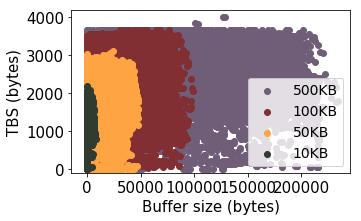

In [177]:
plt.figure(2, figsize=(5,3))

plt.scatter(np.array(bsr_500_dist)[:,0], np.array(bsr_500_dist)[:,1], color = color_set[0])
plt.scatter(np.array(bsr_100_dist)[:,0], np.array(bsr_100_dist)[:,1], color = color_set[1])
plt.scatter(np.array(bsr_50_dist)[:,0], np.array(bsr_50_dist)[:,1], color = color_set[2])
plt.scatter(np.array(bsr_10_dist)[:,0], np.array(bsr_10_dist)[:,1], color = color_set[3])
plt.legend(['500KB','100KB','50KB', '10KB'], fontsize = 14,  loc = 'lower right')
plt.yticks(np.arange(0,4100,1000),fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([-100,4200])
plt.ylabel('TBS (bytes)', fontsize = 15)
plt.xlabel('Buffer size (bytes)', fontsize = 15)

plt.savefig('./mobisys22_figure/grant_dist.pdf', format = 'pdf',  bbox_inches='tight')

In [6]:
def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

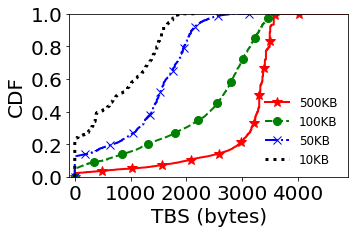

In [95]:
plt.figure(2, figsize=(5,3))

marker_list = ['*', 'o', 'x', '']

cdf(bsr_500_dist[:,1], color = color_set2[0], linestyle = '-', linewidth = 2, markevery = (0.0,0.1), marker = '*', markersize = 10)
cdf(bsr_100_dist[:,1], color = color_set2[1], linestyle = '--', linewidth = 2, markevery = (0.0,0.1), marker = 'o', markersize = 8)
cdf(bsr_50_dist[:,1], color = color_set2[2], linestyle = '-.', linewidth = 2, markevery = (0.0,0.1), marker = 'x', markersize = 8)
cdf(bsr_10_dist[:,1], color = color_set2[3], linestyle = ':',  linewidth = 3, markevery = (0.0,0.1), marker = '', markersize = 8)
plt.ylabel('CDF', fontsize = 20)
plt.xlabel('TBS (bytes)', fontsize = 20)
plt.xlim([-100,4900])
plt.ylim([0,1.0])
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(['500KB','100KB','50KB', '10KB'], fontsize = 12,  loc = 'lower right', frameon = False)
plt.savefig('./mobisys22_figure/grant_cdf.pdf', format = 'pdf',  bbox_inches='tight')

In [97]:
bsr_constant = [0,10,12,14,17,19,22,26,31,36,42,49,57,67,78,91,107,125,146,171,200,234,274,321,276,440,515,603,706,826,
                967,1132,1326,1552,1817,2127,2490,2915,3413,3995,4677,5476,6411,7505,8787,10287,12043,14099,16507,19325,22624,26487,31009,36304,
                42502,49759,58255,68201,79846,93479,109439,128125,150000]

def bsr_table(buffer_size):
    bsr = 63
    for i, constant in enumerate(bsr_constant):
        if buffer_size <= constant:
            bsr = i
            break 
    return bsr

def bsr_table_list(buffer_list):
    bsr_list = np.zeros(len(buffer_list))
    for i, buffer in enumerate(buffer_list):
        bsr_list[i] = bsr_table(buffer[0])
    return bsr_list 
  

In [98]:
bsr_table_list(bsr_500_dist)

array([62., 62., 62., ...,  0.,  0.,  0.])

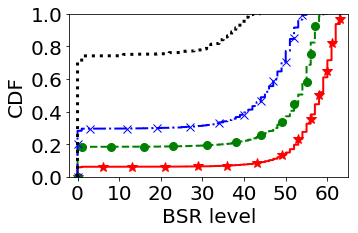

In [99]:
plt.figure(2, figsize=(5,3))

cdf(bsr_table_list(bsr_500_dist), color = color_set2[0], linestyle = '-', linewidth = 2, markevery = (0.0,0.1), marker = '*', markersize = 10)
cdf(bsr_table_list(bsr_100_dist),color = color_set2[1], linestyle = '--', linewidth = 2, markevery = (0.0,0.1), marker = 'o', markersize = 8)
cdf(bsr_table_list(bsr_50_dist), color = color_set2[2], linestyle = '-.', linewidth = 2, markevery = (0.0,0.1), marker = 'x', markersize = 8)
cdf(bsr_table_list(bsr_10_dist), color = color_set2[3], linestyle = ':',  linewidth = 3, markevery = (0.0,0.1), marker = '', markersize = 8)
plt.ylabel('CDF', fontsize = 20)
plt.xlabel('BSR level', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlim([-2,65])
plt.ylim([0,1.0])
plt.savefig('./mobisys22_figure/bsr_cdf.pdf', format = 'pdf',  bbox_inches='tight')

In [37]:
print(np.mean(bsr_10_dist[:,1]))
print(np.mean(bsr_50_dist[:,1]))
print(np.mean(bsr_100_dist[:,1]))
print(np.mean(bsr_500_dist[:,1]))

794.6215335516922
1353.143417620257
2282.9171220091634
3032.143093985304


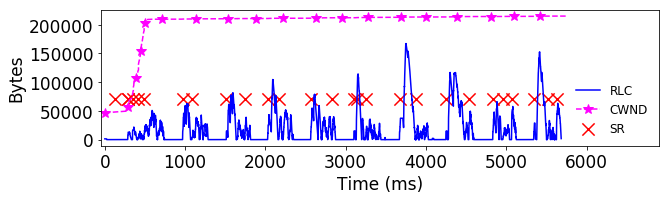

In [4]:
## Latency breakdown figure ver2 (overview)
from datetime import datetime


f = open("./overlink_data/LatencyBreakDown_ver2/latency_breakdown2_cwnd.txt")
lines = f.readlines()
time = []
cwnd = []
for i, line in enumerate(lines):
    dt_obj = datetime.strptime(line[0:23],'%Y-%m-%d %H:%M:%S.%f')
    millisec = dt_obj.timestamp() * 1000
    if i == 0:
        first_time = millisec
    time.append(millisec - first_time)
    cwnd.append((int)(line.split(",")[1]))
    
    
rlc_buffer = np.load('./overlink_data/LatencyBreakDown_ver2/rlc_buffer.npy')
sr_point = np.load('./overlink_data/LatencyBreakDown_ver2/sr_point.npy')
sr_end_point = np.load('./overlink_data/LatencyBreakDown_ver2/sr_end_point.npy')
all_grant = np.load('./overlink_data/LatencyBreakDown_ver2/all_grant.npy')
object_start = np.load('./overlink_data/LatencyBreakDown_ver2/object_start.npy')
object_end = np.load('./overlink_data/LatencyBreakDown_ver2/object_end.npy')

object_end = np.append(object_end, len(rlc_buffer)+1)

# Transmission procedure: slow start
fig, ax1 = plt.subplots(1, figsize = (10,2.5))
plt.xlabel('Time (ms)', size =17)

ax1.plot(rlc_buffer[:], c = 'blue', label = 'RLC')
ax1.set_ylabel('Bytes', size =17)
ax1.plot(time,cwnd, c = 'magenta', marker = '*', linestyle = '--',markersize = 10, markevery = (0.0,0.05), label = 'CWND')

#ax2 = ax1.twinx()
#ax2.plot(np.arange(len(all_grant)),all_grant, c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth =2)
#ax1.plot(np.nan, c = 'orange', linestyle = 'dotted', label = 'TBS',  linewidth =2)
#ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
#ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
#ax2.set_ylabel('TBS (bytes)', size = 15)
#ax1.set_yticks(np.arange(0, 100000, 20000))
#ax1.set_yticklabels(np.arange(0, 100000, 20000), fontsize=13)  


for i in range(len(sr_point)):
    y_point = 70000
    marker_size = 150
        #plt.scatter(sr_point[i], y_point, marker = 'x',  c = 'r', s = marker_size)
        #plt.scatter(sr_end_point[i], y_point, marker = 'o',  c = 'g', s = 100)
        #plt.plot([sr_point[i], sr_end_point[i]], [y_point,y_point], c = 'r', linestyle =':',  linewidth = 3)
    if i == 0:
        plt.scatter(sr_point[i], y_point, marker = 'x',  c = 'r', s = marker_size)
        #plt.scatter(sr_end_point[i], y_point, marker = 'o',  c = 'g', s = 100)
        #plt.plot([sr_point[i], sr_end_point[i]], [y_point,y_point], c = 'magenta', linestyle ='-.',  linewidth = 3)

plt.scatter(130, y_point, marker = 'x',  c = 'r', s = marker_size) 
plt.scatter(sr_point, y_point*np.ones(len(sr_point)), marker = 'x',  c = 'r', s = marker_size, label = 'SR') 
ax1.legend(loc = 'lower right', fontsize =12, frameon = False)
plt.xlim([-50, 6900])
plt.yticks(fontsize = 17)
plt.xticks(fontsize = 17)
plt.savefig('./mobisys22_figure/lb_overview.pdf', format = 'pdf',  bbox_inches='tight')

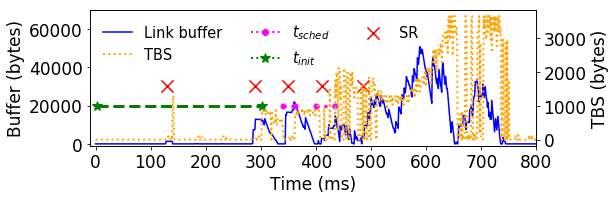

In [8]:
## Latency breakdown figure ver2 (slow start)

fig, ax1 = plt.subplots(1, figsize = (8,2.5))
plt.xlabel('Time (ms)', fontsize =17)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

rlc_buffer[0:120] = 0
rlc_buffer[128:140] = 1300

ax1.plot(rlc_buffer[:], c = 'blue', label = 'Link buffer')
ax1.set_ylabel('Buffer (bytes)', size =17)

ax2 = ax1.twinx()

all_grant[0:130] = 0
all_grant[140] = 1300
all_grant[141] = 1280
ax2.plot(np.arange(len(all_grant)),all_grant, c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth =2)
ax1.plot(np.nan, c = 'orange', linestyle = 'dotted', label = 'TBS',  linewidth =2)
#ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
#ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
ax2.set_ylabel('TBS (bytes)', size = 17)
ax1.set_yticks(np.arange(0, 70000, 20000))
ax1.set_yticklabels(np.arange(0, 70000, 20000), fontsize=17) 
ax1.set_ylim([-1000,70000])

idle_point = np.array([270, 340, 400])
    
y_point = 20000    
  
ax1.scatter(130, 30000, marker = 'x',  c = 'r', s = marker_size) 
ax1.scatter(sr_point, 30000*np.ones(len(sr_point)), marker = 'x',  c = 'r', s = marker_size, label = 'SR') 
ax1.plot(np.nan, c = 'magenta', linestyle = ':', label = r'$t_{sched}$',  linewidth =2, marker = 'o')
ax1.plot([2, sr_end_point[0]], [y_point,y_point], c = 'green', linestyle ='--',  linewidth = 3, marker = '*', markersize = 10)
ax1.plot(np.nan, c = 'green', linestyle = ':', label = r'$t_{init}$',  linewidth =2, marker = '*', markersize = 10)
#ax1.plot([idle_point[0], sr_end_point[0]], [y_point,y_point], c = 'magenta', linestyle =':',  linewidth = 3, marker = 'o', markersize = 5)
ax1.plot([idle_point[1], sr_end_point[1]], [y_point,y_point], c = 'magenta', linestyle =':',  linewidth = 3, marker = 'o', markersize = 5)
ax1.plot([idle_point[2], sr_end_point[2]], [y_point,y_point], c = 'magenta', linestyle =':',  linewidth = 3, marker = 'o', markersize = 5)

#ax1.annotate('Object', xy = (30, 200), xytext = (0, 26000), size = 15)
#ax1.annotate('', xy = (0, 200), xytext = (0, 22000), arrowprops=dict(facecolor = 'red'),size = 12)

plt.xlim([-10,800])
ax1.legend(loc = 'upper left', fontsize =14.5, ncol = 3, frameon = False)
plt.yticks(fontsize = 17)

plt.savefig('./mobisys22_figure/lb_slows-start.pdf', format = 'pdf',  bbox_inches='tight')

In [219]:
sr_point

array([ 290,  350,  410,  485,  970, 1085, 1515, 1745, 2030, 2175, 2570,
       2835, 3105, 3140, 3250, 3680, 3880, 4250, 4535, 4835, 4960, 5070,
       5345, 5520, 5630])

No handles with labels found to put in legend.


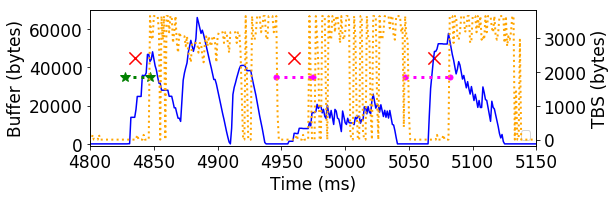

In [132]:
## Latency breakdown figure ver2 (congestion avoidance)

fig, ax1 = plt.subplots(1, figsize = (8,2.5))
plt.xlabel('Time (ms)', fontsize = 17)
plt.xticks(fontsize = 17)

ax1.plot(rlc_buffer[:], c = 'blue')
ax1.set_ylabel('Buffer (bytes)', size =17)


ax2 = ax1.twinx()
ax2.plot(np.arange(len(all_grant)),all_grant, c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth =2)
ax1.plot(np.nan, c = 'orange', linestyle = 'dotted',  linewidth =2)
#ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
#ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
ax2.set_ylabel('TBS (bytes)', size = 17)
ax1.set_yticks(np.arange(0, 70000, 20000))
ax1.set_yticklabels(np.arange(0, 70000, 20000), fontsize=17) 
ax1.set_ylim([-1000,70000])

idle_point = np.array([4827, 4946, 5047])
    
y_point = 35000    
ax1.scatter(sr_point, 45000*np.ones(len(sr_point)), marker = 'x',  c = 'r', s = marker_size) 
#plt.scatter(sr_end_point, y_point*np.ones(len(sr_end_point)), marker = 'o',  c = 'g', s = marker_size, label = 'SR') 
#plt.scatter(idle_point, y_point*np.ones(len(idle_point)), marker = '^',  c = 'magenta', s = marker_size, label = 'SR')

ax1.plot([idle_point[0], sr_end_point[19]], [y_point,y_point], c = 'green', linestyle =':',  linewidth = 3, marker = '*', markersize = 10)
ax1.plot([idle_point[1], sr_end_point[20]], [y_point,y_point], c = 'magenta', linestyle =':',  linewidth = 3, marker = 'o', markersize = 5)
ax1.plot([idle_point[2], sr_end_point[21]], [y_point,y_point], c = 'magenta', linestyle =':',  linewidth = 3, marker = 'o', markersize = 5)

plt.xlim([4800,5150])
ax1.legend(loc = 'lower right', fontsize =12)

plt.yticks(fontsize = 17)
plt.savefig('./mobisys22_figure/lb_congetsion-avoidance.pdf', format = 'pdf',  bbox_inches='tight')

In [40]:
rlc_buffer_trigger = np.load('./overlink_data/TriggerDesign/rlc_buffer.npy')
grant_trigger = np.load('./overlink_data/TriggerDesign/all_grant.npy')
sr_trigger = np.load('./overlink_data/TriggerDesign/sr_point.npy')

No handles with labels found to put in legend.


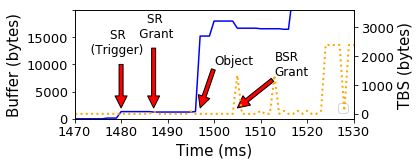

In [63]:
## Latency breakdown figure ver2 (congestion avoidance)

fig, ax1 = plt.subplots(1, figsize = (5,2))
plt.xlabel('Time (ms)', fontsize = 15)
plt.xticks(fontsize = 13)

ax1.plot(rlc_buffer_trigger[:], c = 'blue')
ax1.set_ylabel('Buffer (bytes)', size =15)


ax2 = ax1.twinx()
ax2.plot(np.arange(len(grant_trigger)),grant_trigger, c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth =2)
ax1.plot(np.nan, c = 'orange', linestyle = 'dotted',  linewidth =2)
#ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
#ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
ax2.set_ylabel('TBS (bytes)', size = 15)
#ax1.set_yticks(np.arange(0, 70000, 20000))
ax1.set_yticklabels(np.arange(0, 20000, 5000), fontsize=13) 
ax1.set_ylim([0,20000])

    
y_point = 3500    
#ax1.scatter(sr_trigger, y_point*np.ones(len(sr_trigger)), marker = 'x',  c = 'r', s = marker_size) 
ax1.annotate('        SR\n   (Trigger)', xy = (1470, 2000), xytext = (1471, 12000),size = 12)
ax1.annotate('', xy = (1480, 2000), xytext = (1480, 10000), arrowprops=dict(facecolor = 'red'),size = 12)
ax1.annotate('        SR\n      Grant', xy = (1470, 2000), xytext = (1479, 15000),size = 12)
ax1.annotate('', xy = (1487, 2000), xytext = (1487, 13000), arrowprops=dict(facecolor = 'red'), size = 12)
ax1.annotate('BSR\nGrant', xy = (1505, 2000), xytext = (1513, 8000), arrowprops=dict(facecolor = 'red'), size = 12)
ax1.annotate('Object', xy = (1497, 2000), xytext = (1500, 10000), arrowprops=dict(facecolor = 'red'), size = 12)
#plt.scatter(sr_end_point, y_point*np.ones(len(sr_end_point)), marker = 'o',  c = 'g', s = marker_size, label = 'SR') 
#plt.scatter(idle_point, y_point*np.ones(len(idle_point)), marker = '^',  c = 'magenta', s = marker_size, label = 'SR')

plt.xlim([1470,1530])
ax1.legend(loc = 'lower right', fontsize =12)

plt.yticks(fontsize = 13)
plt.savefig('./mobisys22_figure/bad_dummy.pdf', format = 'pdf',  bbox_inches='tight')

In [446]:
sr_trigger

2627.3698630136987

In [455]:
np.mean(all_grant[5083:5120])

3381.4864864864867

In [451]:
all_grant[5080:5120]

array([   0.,    0., 3662., 3662., 3662., 2865., 3662., 3662., 3062.,
       2961., 3182., 3662., 3662., 3662., 3182., 3302., 3662., 3662.,
       2865., 2961., 3662., 3662., 3662., 3182., 3662., 3302., 3662.,
       2961., 3062., 2961., 3662., 3182., 3662., 3662., 3662., 3302.,
       3182., 3662., 3062., 2961.])

In [ ]:
np.mean(all_grant[4850:4900])

In [4]:
# Effect of dummy object

rlc_buffer_dummy = np.load('./overlink_data/DummyEffect/rlc_buffer.npy')
rlc_buffer_no = np.load('./overlink_data/DummyEffect/rlc_buffer_no.npy')
grant_dummy = np.load('./overlink_data/DummyEffect/all_grant.npy')
grant_no = np.load('./overlink_data/DummyEffect/all_grant_no.npy')

In [5]:
for i, buf in enumerate(grant_dummy):
    if buf < 1000:
        grant_dummy [i] = grant_dummy [i-1]
        

for i, buf in enumerate(grant_no):
    if buf > 3000:
        grant_no [i] = 0        

for i, buf in enumerate(grant_no):
    if buf < 500:
        grant_no [i] = grant_no [i-1]
        

In [6]:
rlc_buffer_dummy

array([   0.,  119.,  119., ..., 6818., 4441., 2062.])

2229.0553548200605


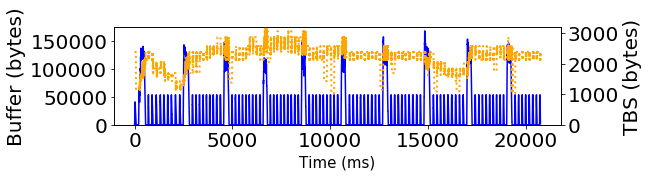

In [140]:
fig, ax1 = plt.subplots(1, figsize = (8,1.8))
plt.xlabel('Time (ms)', fontsize = 15)
plt.xticks(fontsize = 13)

ax2 = ax1.twinx()
ax2.plot(grant_dummy[:], c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth = 2)
ax1.plot(rlc_buffer_dummy, c = 'blue', linestyle = '-')
ax1.set_ylabel('Buffer (bytes)', size =15)
#ax1.axhline(65000, 0.05, 0.95 , color = 'red',linewidth = 5, alpha=1)

ax1.plot(np.nan, c = 'orange', linestyle = 'dotted',  linewidth =2)
#ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
#ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
ax2.set_ylabel('TBS (bytes)', size = 15)
#ax1.set_yticks(np.arange(0, 70000, 20000))
ax1.set_yticklabels(np.arange(0, 160000, 50000), fontsize=13) 
ax2.set_yticklabels(np.arange(0, 3200, 1000), fontsize=13) 
ax1.set_ylim([0,175000])
ax2.set_ylim([0,3200])
plt.savefig('./mobisys22_figure/dummy_effect_on.pdf', format = 'pdf',  bbox_inches='tight')
print(np.mean(grant_dummy)

1139.3822057549803


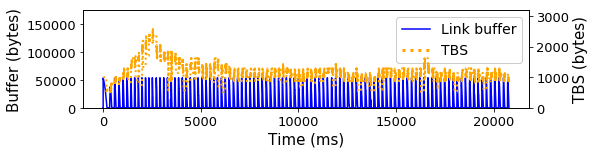

In [74]:
fig, ax1 = plt.subplots(1, figsize = (8,1.8))
plt.xlabel('Time (ms)', fontsize = 15)
plt.xticks(fontsize = 13)

ax2 = ax1.twinx()
ax2.plot(np.arange(len(grant_no)),grant_no, c = 'orange', linestyle = 'dotted', label = 'Swdown',  linewidth =2)
ax1.plot(rlc_buffer_no[:], c = 'blue', linestyle = '-',label = 'Link buffer')
ax1.set_ylabel('Buffer (bytes)', size =15)
ax1.plot(np.nan, c = 'orange', linestyle = 'dotted', label = 'TBS',  linewidth =3)
#ax1.plot(np.nan, c = 'magenta', linestyle = '-.', label = r'$t_{init}$',  linewidth = 3)
#ax1.plot(np.nan, c = 'r', linestyle = ':', label = r'$t_{sched, i}$',  linewidth = 3)
ax2.set_ylabel('TBS (bytes)', size = 15)
#ax1.set_yticks(np.arange(0, 70000, 20000))
ax1.set_yticklabels(np.arange(0, 160000, 50000), fontsize=13) 
l = ax1.legend(loc = 'upper right', fontsize =14, ncol =1, frameon =True, framealpha = 1)
ax1.set_ylim([0,175000])
ax2.set_yticklabels(np.arange(0, 3200, 1000), fontsize=13) 
ax2.set_ylim([0,3000])
ax2.set_ylim([0,3200])
plt.savefig('./mobisys22_figure/dummy_effect_off.pdf', format = 'pdf',  bbox_inches='tight')
print(np.mean(grant_no))

In [60]:
mcs_idle_perf = np.load('./overlink_data/BoosterDesign/mcs_idle.npy')
rb_idle_perf = np.load('./overlink_data/BoosterDesign/rb_idle.npy')

mcs_congest_perf = np.load('./overlink_data/BoosterDesign/mcs_congest.npy')
rb_congest_perf = np.load('./overlink_data/BoosterDesign/rb_congest.npy')

mcs_idle_100KB = np.load('./overlink_data/BoosterDesign/mcs_idle_100.npy')
rb_idle_100KB = np.load('./overlink_data/BoosterDesign/rb_idle_100.npy')

mcs_congest_100KB = np.load('./overlink_data/BoosterDesign/mcs_congest_100.npy')
rb_congest_100KB = np.load('./overlink_data/BoosterDesign/rb_congest_100.npy')

In [32]:
grant_idle_100KB[grant_idle_100KB > 0]/rb_idle_100KB[grant_idle_100KB]

IndexError: arrays used as indices must be of integer (or boolean) type

In [61]:
idle_rb = []
congest_rb = []
for i in rb_idle_100KB:
    idle_rb += i
for i in rb_congest_100KB:
    congest_rb += i

In [65]:
idle_rb

array([], dtype=float64)

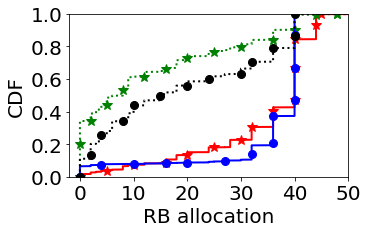

In [104]:
plt.figure(2, figsize=(5,3))

cdf(rb_idle_perf, color = color_set2[0], linestyle = '-', linewidth = 2, markevery = (0.0,0.1), marker = '*', markersize = 10)
cdf(rb_congest_perf, color = color_set2[1], linestyle = ':', linewidth = 2, markevery = (0.0,0.1), marker = '*', markersize = 10)
cdf(rb_idle_100KB , color = color_set2[2], linestyle = '-', linewidth = 2, markevery = (0.0,0.1), marker = 'o', markersize = 8)
cdf(rb_congest_100KB, color = color_set2[3], linestyle = ':', linewidth = 2, markevery = (0.0,0.1), marker = 'o', markersize = 8)


plt.ylabel('CDF', fontsize = 20)
plt.xlabel('RB allocation', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlim([-2,50])
plt.ylim([0,1.0])
plt.savefig('./mobisys22_figure/booster_design_rb.pdf', format = 'pdf',  bbox_inches='tight')

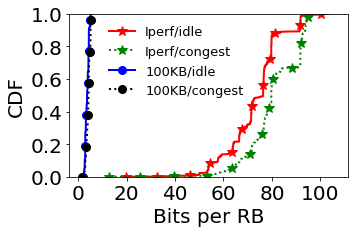

In [110]:
plt.figure(2, figsize=(5,3))

cdf(mcs_idle_perf[mcs_idle_perf > 0]*17.95, color = color_set2[0], linestyle = '-', linewidth = 2, markevery = (0.0,0.1), marker = '*', markersize = 10)
cdf(mcs_congest_perf[mcs_congest_perf > 0]*17.95, color = color_set2[1], linestyle = ':', linewidth = 2, markevery = (0.0,0.1), marker = '*', markersize = 10)
cdf(mcs_idle_100KB[mcs_idle_100KB > 0], color = color_set2[2], linestyle = '-', linewidth = 2, markevery = (0.0,0.1), marker = 'o', markersize = 8)
cdf(mcs_congest_100KB[mcs_congest_100KB > 0], color = color_set2[3], linestyle = ':', linewidth = 2, markevery = (0.0,0.1), marker = 'o', markersize = 8)

plt.legend(['Iperf/idle', 'Iperf/congest', '100KB/idle', '100KB/congest'], fontsize = 13,bbox_to_anchor=(0.1, 1), frameon = False)

plt.ylabel('CDF', fontsize = 20)
plt.xlabel('Bits per RB', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylim([0,1.0])
plt.savefig('./mobisys22_figure/booster_design_mcs.pdf', format = 'pdf',  bbox_inches='tight')

In [ ]:
idle_point = np.array([4540, 4660, 4760])

In [15]:
import time

time.time()

1639661565.7262151

In [26]:
dt_obj = datetime.strptime(time[0],'%Y-%m-%d %H:%M:%S.%f')
millisec = dt_obj.timestamp() * 1000
millisec

1639660853737.0

In [38]:
line[93:99]

'215030'

In [45]:
(int)(lines[0].split(",")[1])

46720

In [11]:
# Linear regression for RSRP/MCS 

path = './overlink_data/rsrp-mcs'
file_list = os.listdir(path)
# get data
rsrp_list = []
mcs_list = []

for file_name in file_list:
    if '.npy' in file_name:
        rsrp_mcs = np.load(path +'/'+file_name)
        rsrp_list.extend(rsrp_mcs[0])
        mcs_list.extend(rsrp_mcs[1])

rsrp_list = np.array(rsrp_list)
mcs_list = np.array(mcs_list)
        
mask1 = rsrp_list < 0
mask2 = mcs_list > 0        
mask = mask1*mask2
rsrp_list = rsrp_list[mask]
mcs_list = mcs_list[mask]
rsrp_list = rsrp_list.reshape(-1,1)
mcs_list = mcs_list.reshape(-1,1)
        
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X = rsrp_list, y = mcs_list)
print(round(model.intercept_[0],2))
print(round(model.coef_[0][0],2))
print(np.corrcoef(rsrp_list[:,0], mcs_list[:,0])[0,1])

11.97
0.11
0.8769748243153525


In [10]:
rsrp_list[:,0]

array([-104.4375, -104.4375, -104.5625, ...,  -94.875 ,  -94.875 ,
        -94.875 ])

(array([-120., -110., -100.,  -90.,  -80.,  -70.,  -60.,  -50.]),
 <a list of 8 Text xticklabel objects>)

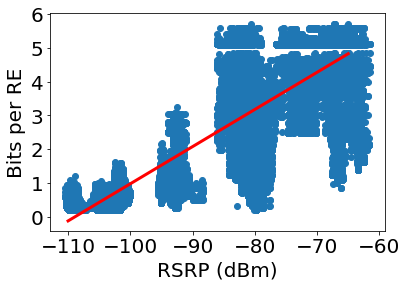

In [4]:
rsrp_sample = [-65, -70, -75, -80, -85, -90, -95, -100, -105, -110]
rsrp_sample = np.array(rsrp_sample).reshape(-1,1)
plt.scatter(rsrp_list, mcs_list)
plt.plot(rsrp_sample, model.predict(rsrp_sample), color = 'r', linewidth = 3)

plt.ylabel('Bits per RE', fontsize = 20)
plt.xlabel('RSRP (dBm)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

In [410]:
model.predict(-81)

array([[3.06497221]])

In [212]:
# ANN module
import torch
from torch import nn, optim                           # torch 에서 제공하는 신경망 기술, 손실함수, 최적화를 할 수 있는 함수들을 불러온다.
from torch.utils.data import DataLoader, Dataset      # 데이터를 모델에 사용할 수 있게 정리해주는 라이브러리.
import torch.nn.functional as F

class Regressor(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc1 = nn.Linear(1, 256, bias=True) # 입력층(13) -> 은닉층1(50)으로 가는 연산
        self.fc2 = nn.Linear(256, 128, bias=True) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
        self.fc3 = nn.Linear(128, 1, bias=True) # 은닉층2(30) -> 출력층(1)으로 가는 연산
        self.dropout = nn.Dropout(0.2) # 연산이 될 때마다 20%의 비율로 랜덤하게 노드를 없앤다.

    def forward(self, x): # 모델 연산의 순서를 정의
        x = F.relu(self.fc1(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
      
        return x

class TensorData(Dataset):

    def __init__(self, x_data, y_data, device):
        self.x_data = torch.FloatTensor(x_data).to(device)
        self.y_data = torch.FloatTensor(y_data).to(device)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):

        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len

In [213]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device('cuda:0' if USE_CUDA else 'cpu')

True


In [214]:
model = Regressor().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

trainsets = TensorData(rsrp_list, mcs_list, device)
trainloader = torch.utils.data.DataLoader(trainsets, batch_size = 1024, shuffle=True)
testsets = TensorData(rsrp_list, mcs_list, device)
testloader = torch.utils.data.DataLoader(testsets, batch_size = 1024, shuffle=False)

In [215]:
loss_ = []
n = len(trainsets)

for epoch in range(100):
    running_loss = 0.0 
    for i, data in enumerate(trainloader, 0): # 무작위로 섞인 32개의 데이터가 담긴 배치가 하나씩 들어온다.
        inputs, values = data # data에는 X, Y가 들어있다.
        optimizer.zero_grad() # 최적화 초기화.

        outputs = model(inputs) # 모델에 입력값을 넣어 예측값을 산출한다.
        loss = criterion(outputs, values) # 손실함수를 계산. error 계산.
        loss.backward() # 손실 함수를 기준으로 역전파를 설정한다.
        optimizer.step() # 역전파를 진행하고 가중치를 업데이트한다.

        running_loss += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더한다.

        loss_.append(running_loss/n) # MSE(Mean Squared Error) 계산
    print('Epoch: ', epoch, 'Running loss: ',running_loss)

Epoch:  0 Running loss:  2095.5440006256104
Epoch:  1 Running loss:  2096.0535049438477
Epoch:  2 Running loss:  2096.4668340682983
Epoch:  3 Running loss:  2095.2583990097046
Epoch:  4 Running loss:  2095.9054651260376
Epoch:  5 Running loss:  2095.6067218780518
Epoch:  6 Running loss:  2095.890055656433
Epoch:  7 Running loss:  2095.573084831238
Epoch:  8 Running loss:  2095.7991971969604
Epoch:  9 Running loss:  2095.9963912963867
Epoch:  10 Running loss:  2095.508726119995
Epoch:  11 Running loss:  2096.3124046325684
Epoch:  12 Running loss:  2095.870988845825
Epoch:  13 Running loss:  2095.4706354141235
Epoch:  14 Running loss:  2095.5777411460876
Epoch:  15 Running loss:  2096.187071800232
Epoch:  16 Running loss:  2095.5200662612915
Epoch:  17 Running loss:  2095.398551940918
Epoch:  18 Running loss:  2095.5038261413574
Epoch:  19 Running loss:  2095.493369102478
Epoch:  20 Running loss:  2096.2641954421997
Epoch:  21 Running loss:  2095.4771013259888
Epoch:  22 Running loss:  2

In [206]:
a, b= data

In [211]:
model(a)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<ReluBackward0>)

-69.86565216305326


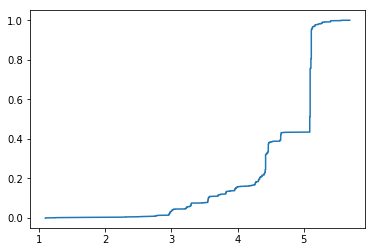

In [142]:
rsrp_mcs = np.load(path +'/'+'rsrp_mcs_good_3.npy')

rsrp_list = np.array(rsrp_mcs[0])
mcs_list = np.array(rsrp_mcs[1])
        
mask1 = rsrp_list < 0
mask2 = mcs_list > 0        
mask = mask1*mask2
rsrp_list = rsrp_list[mask]
mcs_list = mcs_list[mask]
rsrp_list = rsrp_list.reshape(-1,1)
mcs_list = mcs_list.reshape(-1,1)

print(np.mean(rsrp_list))
cdf(mcs_list)

In [130]:
path +'/'+'rsrp_mcs_vergood_1.npy'

'./overlink_data/rsrp-mcs/rsrp_mcs_vergood_1.npy'

In [84]:
rsrp_list

array([[   0.    , -104.4375, -104.4375, ...,  -94.875 ,  -94.875 ,
         -94.875 ]])

In [54]:
file_list = os.listdir(path)
file_list

['rsrp_mcs_verybad_3.npy',
 'rsrp_mcs_verybad_1.npy',
 'rsrp_mcs_verygood_1.npy',
 '.ipynb_checkpoints',
 'rsrp_mcs_verybad_2.npy',
 'rsrp_mcs_good_2.npy',
 'rsrp_mcs_good_1.npy',
 'rsrp_mcs_verygood_3.npy',
 'rsrp_mcs_good_3.npy',
 'rsrp_mcs_verygood_2.npy',
 'rsrp_mcs_medium_1.npy',
 'rsrp_mcs_medium_2.npy',
 'rsrp_mcs_medium_3.npy']

In [121]:
## Evaluation

In [218]:
# Figure1. Latency ratio
seoul_folder = './final_evaluation/bullet/seoul/latency/'
singapore_folder =  './final_evaluation/bullet/singapore/latency/'

default_folder = './final_evaluation/'

seoul_list = os.listdir(seoul_folder)
singapore_list = os.listdir(singapore_folder)

scheme = ['bullet/'] #'cubic/', 'bbr/', 'qcut/']
server = ['seoul/', 'signapore/']
figure_name = 'latency/'
interval = [10, 100, 1000]
size = [10, 20, 50, 100, 200, 500, 1000]

whole_list = [[[[[] for _ in range(len(size))] for _ in range(len(interval))] for _ in range(len(server))] for _ in range(len(scheme))]

for a,sch  in enumerate(scheme):
    for b,ser in enumerate(server):
        folder_name = default_folder + sch + ser + figure_name
        for c,inter in enumerate(interval):
            for d,sz in enumerate(size):
                for latency in seoul_list:
                    if str(sz)+'_'+str(inter) in folder_name+latency:
                        f = open(seoul_folder+latency)
                        rdr = csv.reader(f)
                        latency_arr = np.zeros(99)
                        for e,line in enumerate(rdr):
                            if e !=0:
                                latency_arr[e-1] = line[1]
                        whole_list[a][b][c][d] = latency_arr
whole_list

#whole_list = [[] for _ in range(len(scheme))]

[[[[array([40., 54., 59., 61., 51., 44., 47., 48., 54., 47., 42., 42., 45.,
           66., 39., 38., 42., 39., 59., 82., 39., 42., 42., 40., 41., 68.,
           72., 50., 43., 40., 50., 52., 47., 51., 46., 67., 46., 44., 38.,
           43., 55., 44., 43., 41., 39., 47., 40., 57., 42., 42., 69., 45.,
           74., 48., 38., 40., 48., 46., 52., 44., 53., 45., 46., 46., 40.,
           47., 45., 68., 46., 37., 60., 45., 48., 47., 46., 48., 58., 50.,
           44., 51., 69., 53., 53., 44., 65., 55., 67., 47., 49., 46., 46.,
           52., 42., 49., 44., 46., 43., 52., 37.]),
    array([ 66.,  69.,  56.,  65.,  68.,  56.,  65.,  56.,  52.,  49.,  54.,
            75.,  48.,  54.,  51.,  57.,  95.,  69.,  69.,  66.,  84.,  59.,
            54.,  65.,  53.,  59.,  50.,  87.,  73.,  59.,  51.,  52.,  49.,
            58.,  49.,  70.,  55.,  54.,  67.,  50.,  49.,  47.,  60.,  55.,
            58.,  60.,  58.,  55.,  55.,  49.,  46.,  51.,  51.,  51.,  59.,
            63.,  49.,  53.,  

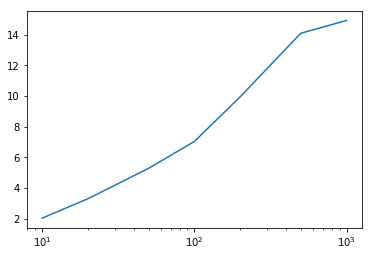

In [265]:
x = size

# latency

plt.errorbar(size, (np.ones(len(size))*size*10)/(np.mean(whole_list[0][0][1][:],1)))
plt.xscale("log")

In [257]:
(np.ones(len(size))*size*1024)/(np.mean(whole_list[0][0][1][:],1))

array([ 209.32479868,  338.88016045,  541.76998717,  721.33200512,
       1019.36651584, 1443.60902256, 1529.51116476])

In [256]:
(np.mean(whole_list[0][0][1][:],1))

SyntaxError: unexpected EOF while parsing (<ipython-input-256-e527ce7b115c>, line 1)

In [209]:
# Figure2. Dummy ratio
seoul_folder = './final_evaluation/bullet/seoul/latency/'
singapore_folder =  './final_evaluation/bullet/singapore/latency/'

default_folder = './final_evaluation/'

seoul_list = os.listdir(seoul_folder)
singapore_list = os.listdir(singapore_folder)

scheme = ['bullet/'] #'cubic/', 'bbr/', 'qcut/']
server = ['seoul/', 'signapore/']
figure_name = 'latency/'
interval = [10, 100, 1000]
size = [10, 20, 50, 100, 200, 500, 1000]

dummy_list = [[[[[] for _ in range(len(size))] for _ in range(len(interval))] for _ in range(len(server))] for _ in range(len(scheme))]

for a,sch  in enumerate(scheme):
    for b,ser in enumerate(server):
        folder_name = default_folder + sch + ser + figure_name
        for c,inter in enumerate(interval):
            for d,sz in enumerate(size):
                for latency in seoul_list:
                    if str(sz)+'_'+str(inter) in folder_name+latency:
                        f = open(seoul_folder+latency)
                        rdr = csv.reader(f)
                        latency_arr = np.zeros(99)
                        for e,line in enumerate(rdr):
                            if e !=0:
                                latency_arr[e-1] = line[5]
                        latency_list[c][d] = latency_arr
                        whole_list[a][b][c][d] = latency_list
        

#whole_list = [[] for _ in range(len(scheme))]

[[[[[[array([10270.,  9124.,  9708.,  5700., 10270.,  9792.,  9606.,  7904.,
              8527., 10270., 10270., 10270., 10270.,   468., 10270., 10018.,
             10270., 10270.,   477.,   530., 10270., 10270., 10270., 10094.,
             10270.,   450.,   477.,  9471., 10105., 10270., 10270.,   464.,
             10270., 10270.,  9394.,   374., 10120., 10270., 10270.,  9942.,
             10270., 10270., 10270., 10270., 10270., 10270., 10270., 10270.,
             10270., 10108., 10131., 10270.,   483., 10270.,  9984., 10270.,
             10270.,  9165.,  8155.,  9300.,  9365., 10059., 10270.,  8540.,
             10270., 10270.,  9781.,   450., 10270., 10270., 10270., 10270.,
             10270., 10270.,  7932., 10270.,   369., 10270.,  9874.,  5905.,
               495., 10270.,  7559.,  9238.,  8341.,   447.,   450.,  7641.,
              5866.,  8396., 10110.,  8807., 10270.,  9904.,  8595.,  9098.,
              9758.,  7433., 10270.]),
      array([ 5311.,  8171., 10288., 

In [202]:
latency_list

[[array([40., 54., 59., 61., 51., 44., 47., 48., 54., 47., 42., 42., 45.,
         66., 39., 38., 42., 39., 59., 82., 39., 42., 42., 40., 41., 68.,
         72., 50., 43., 40., 50., 52., 47., 51., 46., 67., 46., 44., 38.,
         43., 55., 44., 43., 41., 39., 47., 40., 57., 42., 42., 69., 45.,
         74., 48., 38., 40., 48., 46., 52., 44., 53., 45., 46., 46., 40.,
         47., 45., 68., 46., 37., 60., 45., 48., 47., 46., 48., 58., 50.,
         44., 51., 69., 53., 53., 44., 65., 55., 67., 47., 49., 46., 46.,
         52., 42., 49., 44., 46., 43., 52., 37.]),
  array([ 66.,  69.,  56.,  65.,  68.,  56.,  65.,  56.,  52.,  49.,  54.,
          75.,  48.,  54.,  51.,  57.,  95.,  69.,  69.,  66.,  84.,  59.,
          54.,  65.,  53.,  59.,  50.,  87.,  73.,  59.,  51.,  52.,  49.,
          58.,  49.,  70.,  55.,  54.,  67.,  50.,  49.,  47.,  60.,  55.,
          58.,  60.,  58.,  55.,  55.,  49.,  46.,  51.,  51.,  51.,  59.,
          63.,  49.,  53.,  47.,  49.,  56.,  52.,  58.,

In [176]:
import csv

size = [10, 20, 50, 100, 200, 500, 1000]
interval = [10, 100, 1000]
latency_list = [[[] for _ in range(len(size))] for _ in range(len(interval))]

for i,sz in enumerate(size):
    for j,int in enumerate(interval):
        for latency in singapore_list:
            if str(sz)+'_'+str(int) in singapore_folder+latency:
                f = open(singapore_folder+latency)
                rdr = csv.reader(f)
                for line in rdr[1:]:
                    print(line[1])
                

TypeError: '_csv.reader' object is not subscriptable

In [164]:
latency_list = [[[] for _ in range(len(size))] for _ in range(len(interval))]
latency_list

[[[], [], [], [], [], [], []],
 [[], [], [], [], [], [], []],
 [[], [], [], [], [], [], []]]

In [165]:
for line in rdr:
    print(line)

['time', 'overallLatency', 'uplinkLatency', 'downlinkLatency', 'goodput']
['1640008449356', '681', '638', '43', '12.245297805642632', '16712']
['1640008449361', '642', '600', '42', '13.020833333333334', '12091']
['1640008449362', '717', '675', '42', '11.574074074074073', '20510']
['1640008449362', '768', '722', '46', '10.820637119113574', '18849']
['1640008449363', '717', '675', '42', '11.574074074074073', '18448']
['1640008449365', '770', '725', '45', '10.775862068965518', '18964']
['1640008449366', '758', '717', '41', '10.896094839609484', '18897']
['1640008449366', '766', '721', '45', '10.835644937586686', '16596']
['1640008449367', '715', '671', '44', '11.643070044709388', '18558']
['1640008449368', '667', '623', '44', '12.540128410914928', '19574']
['1640008449369', '736', '695', '41', '11.241007194244606', '14088']
['1640008449369', '766', '720', '46', '10.850694444444445', '19109']
['1640008449370', '902', '859', '43', '9.09487776484284', '15239']
['1640008449371', '619', '580',

In [16]:
(4050*7+2700)/((447+97+90+84+8005+316+99+5383)/1e3)

2138.282487431995

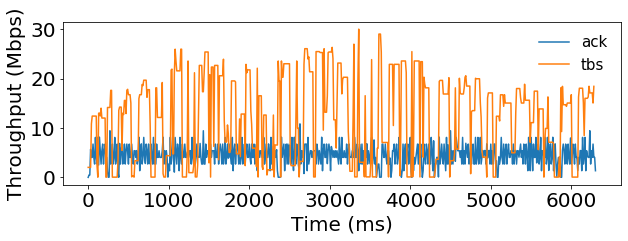

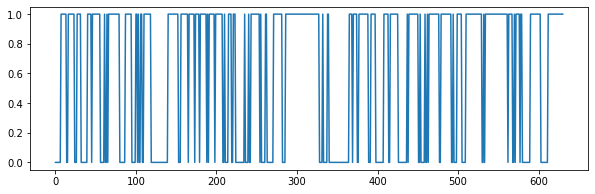

In [38]:
# Uplink bottleneck analyze
import re

ack_rate = []
tbs_rate = []
bottleneck = []

f = open("UplinkBottleneck/bottleneck.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    a = line.find('ack_rate_')
    split_txt = line.split(':')
    ack = (int)(re.findall(r'\d+', split_txt[4])[0])
    tbs = (int)(re.findall(r'\d+', split_txt[5])[0])
    ack_rate.append(ack)
    tbs_rate.append(tbs)
    try:
        if ack < 0.8*tbs_rate[-2] and tbs > 100 and ack > 100:
            bottleneck.append(1)
        else:
            bottleneck.append(0)
    except:
        bottleneck.append(0)
f.close()


plt.figure(2, figsize=(10,3))
plt.plot(np.arange(0,len(ack_rate)*10,10),np.array(ack_rate)/100)
plt.plot(np.arange(0,len(tbs_rate[2:])*10,10),np.array(tbs_rate[2:])/100)
plt.ylabel('Throughput (Mbps)', fontsize = 20)
plt.xlabel('Time (ms)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(np.arange(0,31,10),fontsize = 20)
plt.legend(['ack', 'tbs'], fontsize = 15, frameon = False)

plt.figure(3, figsize=(10,3))
plt.plot(bottleneck)

In [34]:
np.array(tbs_rate)/1000

array([0.007, 0.191, 0.203, 0.203, 0.203, 0.203, 1.086, 1.242, 1.242,
       1.242, 1.242, 1.242, 1.242, 0.228, 0.004, 1.301, 1.301, 1.244,
       1.402, 1.202, 1.202, 1.202, 1.202, 1.202, 0.004, 0.006, 1.416,
       1.416, 1.416, 1.416, 1.763, 1.763, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.338, 1.359, 1.424, 1.424, 1.424, 0.548,
       1.301, 1.273, 1.559, 1.559, 1.292, 1.763, 1.784, 1.675, 1.675,
       1.675, 1.506, 0.011, 0.026, 0.026, 0.005, 0.338, 0.338, 0.338,
       0.338, 0.338, 1.596, 1.675, 1.675, 1.675, 1.882, 1.859, 1.969,
       1.969, 1.969, 1.969, 1.622, 1.777, 1.777, 1.777, 1.056, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.006, 1.814, 1.814, 1.214, 1.214,
       1.214, 1.214, 1.214, 1.214, 1.922, 0.074, 0.007, 0.007, 0.007,
       0.439, 0.439, 0.439, 0.439, 0.439, 0.439, 2.174, 2.193, 0.477,
       0.477, 2.101, 2.597, 2.358, 2.158, 2.158, 2.158, 2.158, 2.158,
       2.597, 2.597, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.477,
       2.358, 0.096,

In [67]:
bottleneck

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0]

In [68]:
np.sum(bottleneck)

34

In [45]:
ack_rate

[['3'],
 ['5'],
 ['1079'],
 ['810'],
 ['2160'],
 ['1200'],
 ['3'],
 ['5'],
 ['1619'],
 ['810'],
 ['2820'],
 ['3'],
 ['5'],
 ['1214'],
 ['1215'],
 ['2820'],
 ['3'],
 ['5'],
 ['269'],
 ['270'],
 ['1080'],
 ['1620'],
 ['135'],
 ['1620'],
 ['1068'],
 ['675'],
 ['810'],
 ['2025'],
 ['1485'],
 ['1890'],
 ['1350'],
 ['1350'],
 ['540'],
 ['30'],
 ['3'],
 ['5'],
 ['2571'],
 ['1755'],
 ['675'],
 ['1876'],
 ['945'],
 ['810'],
 ['675'],
 ['675'],
 ['2430'],
 ['405'],
 ['1755'],
 ['1620'],
 ['675'],
 ['1215'],
 ['945'],
 ['2430'],
 ['237'],
 ['5'],
 ['809'],
 ['1620'],
 ['1080'],
 ['1745'],
 ['2025'],
 ['2025'],
 ['1485'],
 ['1350'],
 ['1755'],
 ['3240'],
 ['1215'],
 ['592'],
 ['3'],
 ['417'],
 ['1215'],
 ['1620'],
 ['3090'],
 ['2970'],
 ['1350'],
 ['2565'],
 ['2700'],
 ['1080'],
 ['1258'],
 ['3'],
 ['5'],
 ['6'],
 ['809'],
 ['270'],
 ['2835'],
 ['1875'],
 ['1485'],
 ['1620'],
 ['2835'],
 ['1620'],
 ['3510'],
 ['2295'],
 ['1350'],
 ['436'],
 ['3'],
 ['5'],
 ['6'],
 ['404'],
 ['2700'],
 ['2025'],
 [

In [68]:
## object_dict analyzer
import pickle

with open('./overlink_data/220210-microbenchmark/conv.pkl', 'rb') as f:
    conv_dict = pickle.load(f)
with open('./overlink_data/220210-microbenchmark/nodeact.pkl', 'rb') as f:
    nodeact_dict = pickle.load(f)
with open('./overlink_data/220210-microbenchmark/deact.pkl', 'rb') as f:
    deact_dict = pickle.load(f)

In [69]:
conv_dict

{'overall': [94.0,
  90.0,
  67.0,
  88.0,
  69.0,
  405.0,
  63.0,
  70.0,
  72.0,
  81.0,
  66.0,
  72.0,
  88.0,
  81.0,
  89.0,
  90.0,
  86.0,
  61.0,
  62.0,
  79.0,
  78.0,
  89.0,
  97.0,
  82.0,
  76.0,
  78.0,
  73.0,
  70.0,
  66.0,
  68.0,
  73.0,
  68.0,
  86.0,
  75.0,
  69.0,
  76.0,
  86.0,
  126.0,
  129.0,
  75.0,
  89.0,
  90.0,
  107.0,
  80.0,
  69.0,
  67.0,
  68.0,
  66.0,
  73.0,
  66.0,
  69.0,
  70.0,
  69.0,
  61.0,
  59.0,
  66.0,
  59.0,
  57.0,
  63.0,
  50.0,
  53.0,
  50.0,
  57.0,
  64.0,
  52.0,
  52.0,
  46.0,
  62.0,
  56.0,
  49.0,
  52.0,
  81.0,
  81.0,
  43.0,
  44.0,
  45.0,
  40.0,
  43.0,
  49.0,
  80.0,
  37.0,
  44.0,
  69.0,
  41.0,
  45.0,
  47.0,
  46.0,
  53.0,
  45.0,
  51.0,
  45.0,
  57.0,
  72.0,
  54.0,
  50.0,
  55.0,
  58.0,
  47.0,
  45.0,
  56.0,
  47.0,
  57.0,
  58.0,
  58.0,
  65.0,
  68.0,
  72.0,
  81.0,
  49.0,
  56.0,
  67.0,
  56.0,
  48.0,
  68.0,
  63.0,
  70.0,
  87.0,
  45.0,
  53.0,
  82.0,
  71.0,
  84.0,
  81.0,
 

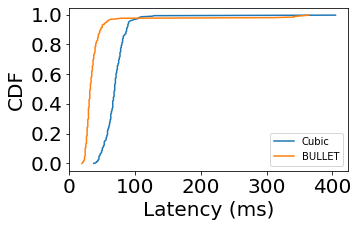

In [70]:
## overall latency

def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs) if plot else (x, y)


plt.figure(2, figsize=(5,3))

plt.xlabel('Latency (ms)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(np.arange(0,401,100),fontsize = 20)
plt.ylabel('CDF', fontsize = 20)
cdf(conv_dict['overall'])
cdf(nodeact_dict['overall'])
plt.legend(['Cubic', 'BULLET'])

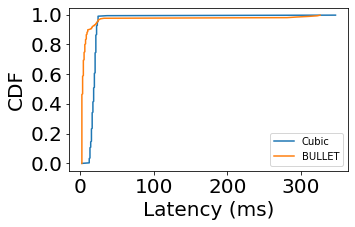

In [71]:
## init latency

plt.figure(2, figsize=(5,3))

plt.xlabel('Latency (ms)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(np.arange(0,401,100),fontsize = 20)
plt.ylabel('CDF', fontsize = 20)
cdf(conv_dict['init'])
cdf(nodeact_dict['init'])
plt.legend(['Cubic', 'BULLET'])

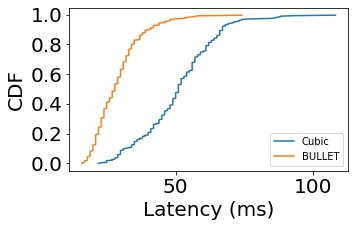

In [72]:
## tx latency

plt.figure(2, figsize=(5,3))

plt.xlabel('Latency (ms)', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(np.arange(0,101,50),fontsize = 20)
plt.ylabel('CDF', fontsize = 20)
cdf(conv_dict['tx'])
cdf(nodeact_dict['tx'])
plt.legend(['Cubic', 'BULLET'])

2.617219823246192
1.7962460124900534
1.2979914557506886


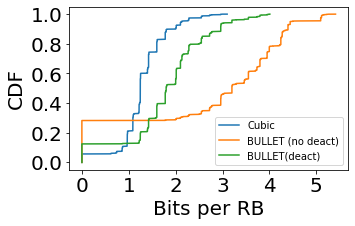

In [90]:
## tx latency

plt.figure(2, figsize=(5,3))

plt.xlabel('Bits per RB', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('CDF', fontsize = 20)
cdf(conv_dict['mcs'])
cdf(nodeact_dict['mcs'])
cdf(deact_dict['mcs'])
plt.legend(['Cubic', 'BULLET (no deact)', 'BULLET(deact)'])
print(np.mean(nodeact_dict['mcs']))
print(np.mean(deact_dict['mcs']))
print(np.mean(conv_dict['mcs']))

In [86]:
print(np.sum(conv_dict['rb'])/270)
print(np.sum(nodeact_dict['rb'])/240)
print(np.sum(deact_dict['rb'])/240)

2068.2185185185185
776.1791666666667
1323.5708333333334


In [104]:
import pandas
import csv

f = open('./measurements/220211-evaluationTest/example.csv', 'r')
rdr = csv.reader(f)
object_info = []

for i,row in enumerate(rdr):
    if i==0:
        continue
    object_info.append(row)

In [106]:
object_info[0]

['20030', '51200', '40530']

In [102]:
f = open('./measurements/220211-evaluationTest/example.csv', 'r')
a = f.readline()

In [103]:
a

'trigger,object,booster\n'

In [110]:
53686/51200

1.0485546875

In [117]:
1282+1282+1282+1282+1138+1280+1282+1282+1284+1282+1280+1282+994+1136 + 2934

20302

In [119]:
51200*1.045

53504.0